# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [479]:
import requests
from collections import Counter
from itertools import product
from time import sleep
import json

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [4]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-02-23T13:01:29+0300',
 'created_at': '2023-02-23T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [5]:
data['found']

241

Количество страниц в результатах поиска

In [6]:
data['pages']

25

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address,employer.logo_urls,salary,department.id,department.name,insider_interview.id,insider_interview.url
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-02-23T13:01:29+0300,2023-02-23T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74257661,False,Data scientist,NaN,False,False,None,None,2023-02-23T15:02:29+0300,2023-02-23T15:02:29+0300,...,133,55.7232,37.5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-25T14:31:00+0300,2023-02-25T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-02-23T12:06:39+0300,2023-02-23T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-02-23T15:00:20+0300,2023-02-23T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

На hh.ru по запросам, представленным ниже, на момен выполнения задания выдаёт следующее количество вакансий:
* Data Scientist - 260 вакансий в Москве
* Аналитик данных - 6687 вакансий в Москве
* Исследователь данных - 203 вакансий в Москве
* Data analyst - 1323 вакансий в Москве

Соберём информацию об этих вакансиях.

In [679]:
URL = 'https://api.hh.ru/vacancies'

vacancies = {'Data Scientist','Аналитик данных', 'Исследователь данных',
             'Data analyst'}

params = [[{
    'text': j,
    'area': 1,
    'page': i,
    'per_page': 100
} for i in range(70) for j in vacancies] for j in vacancies]

data = list()
for page, vacancy in product(range(67), range(len(vacancies))):
    req = requests.get(URL, params[vacancy][page])
    data.extend(json.loads(req.content.decode())['items'])
    sleep(0.2)

In [680]:
sampled = pd.DataFrame(data)

Посмотрим на параметры, которые выдаёт к каждой вакансии

In [681]:
sampled.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'address',
       'response_url', 'sort_point_distance', 'published_at', 'created_at',
       'archived', 'apply_alternate_url', 'insider_interview', 'url',
       'adv_response_url', 'alternate_url', 'relations', 'employer', 'snippet',
       'contacts', 'schedule', 'working_days', 'working_time_intervals',
       'working_time_modes', 'accept_temporary', 'professional_roles',
       'accept_incomplete_resumes'],
      dtype='object')

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [148]:
df = sampled.copy()
df = df.drop_duplicates(subset='id')
df.reset_index(drop=True, inplace=True)
df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes
0,77209273,False,Аналитик/исследователь,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Зубовский бульва...",...,"{'id': '5914441', 'name': 'Sensemachine', 'url...",{'requirement': 'С аналитическими навыками: ст...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False
1,77538972,False,Исследователь,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Зоологическая ул...",...,"{'id': '5332874', 'name': 'СберОбразование', '...",{'requirement': 'Опыт кабинетных исследований ...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '79', 'name': 'Научный специалист, исс...",False
2,76734224,False,Аналитик/Исследователь,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 100000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кольцевая линия'...",...,"{'id': '3544865', 'name': 'ABCstaff', 'url': '...",{'requirement': 'Опыт написания исследовательс...,NaN,"{'id': 'flexible', 'name': 'Гибкий график'}",[],[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False
3,77592503,False,Аналитик-исследователь (маркетинговые исследов...,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 40000, 'to': 40000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,"{'id': '677395', 'name': 'Profpoint', 'url': '...",{'requirement': 'Законченное высшее образовани...,NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True,"[{'id': '10', 'name': 'Аналитик'}]",True
4,77294569,False,Старший исследователь больших данных,"{'id': '7172-7172-it', 'name': 'Лента, федерал...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,"{'id': '7172', 'name': 'Лента, федеральная роз...","{'requirement': 'Процессить данные (Hadoop, Sp...",NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,54765061,False,Аналитик бизнес-процессов,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': '5-я улица Ямског...",...,"{'id': '27989', 'name': 'Телеканал Россия, ГТК...",{'requirement': 'Умение ясно и грамотно излага...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False
2987,77333575,False,Ведущий бизнес-аналитик / Эксперт,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 275000, 'to': 350000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Красная Пр...",...,"{'id': '5425702', 'name': 'Интегрика', 'url': ...","{'requirement': 'выше: ИП, КСП, ТДО). Опыт раб...",NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False
2988,76772407,False,Аналитик BI,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Коровий Ва...",...,"{'id': '1329', 'name': 'Европлан', 'url': 'htt...",{'requirement': 'Навыки анализа <highlighttext...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '150', 'name': 'Бизнес-аналитик'}]",False
2989,76975221,False,Бизнес-Аналитик (IT),NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 180000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [99]:
my_list = list()

for i in range(len(df['id'])):
    vacancy = df.iloc[i]['id']
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

    req = requests.get(vacancy_url)
    tmp_frame = pd.json_normalize(json.loads(req.content.decode()), max_level=0)
    my_list.append(tmp_frame)

    sleep(0.3)

df_dt = pd.concat(my_list).reset_index(drop=True)
df_dt

Удалим колонки, которые не понадобятся в работе. Описание причин удаления некоторых из них:

*premium* - влияет на продвижение конкретной вакансии в выпадающем по запросу
списке, никак не относится к цели исследования  

*insider_interview* - 'Интервью о жизни в компании' согласно документации, такое
будет трудно анализировать  

*response_letter_required* - наличие сообщения при отклике, думаю, в первую оче-
работодатель смотрит на указанные навыки  

*accept_incomplete_resumes* - Разрешен ли отклик на вакансию неполным резюме, 
можно было бы предположить, что если работодатель хочет найти сотрудника
бытро или ищет опытных сотрудников, то этот пункт будет влиять, но кажется,
что исследование такого вопроса будет очень трудозатратным, а результаты 
незначительны, т.к., по моему мнению, на такое влияет много разных признаков  

*created_at* - время создания публикации  

*published_at* - судя по описанию на github, дублируется параметром created_at  

*schedule* - график работы не имеет отношения к поставленным вопросам  

*contacts* - контакты, как мне кажется, не несут смысловой нагрузки    

In [497]:
# Перед запуском посмотреть на колонки, которые пришли с датасетом
data_dt = df_dt.copy()
data_dt = data_dt[data_dt.request_id.isna()]
data_dt.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages', 'errors', 'request_id'],
      dtype='object')

In [498]:
less_columns = {'premium', 'billing_type', 'relations', 'insider_interview',
                'response_letter_required', 'area', 'insider_interview', 'test',
                'insider_interview', 'allow_messages', 'description',
                'branded_description', 'vacancy_constructor_template', 'code',
                'accept_kids', 'response_url', 'hidden', 'created_at', 'errors',
                'quick_responses_allowed', 'driver_license_types', 'has_test',
                'accept_incomplete_resumes', 'published_at', 'contacts',
                'initial_created_at', 'negotiations_url', 'schedule',
                'suitable_resumes_url', 'apply_alternate_url', 'alternate_url',
                'accept_temporary', 'department', 'employment', 'request_id',
                'accept_handicapped', 'working_days', 'working_time_intervals',
                'working_time_modes'}

new_df = (data_dt.drop(labels=less_columns, axis=1)).copy()

Поменяем тип данных в некоторых столбцах, чтобы было проще парсить и искать по ключевым словам.

In [499]:
new_df['name'] = str(new_df['name'])
new_df['specializations'] = str(new_df['specializations'])
new_df['professional_roles'] = str(new_df['professional_roles'])

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [102]:
data_dt.to_excel (r'C:\Users\Nikolay\Downloads\my_data_df_dt.xlsx')

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

Отбросим вакансии, которые могли попасть случайно из-за рекомендательной системы сайта. У ключевых слов уберём первую букву, чтобы не дублировать вариант с маленькой буквы.

In [379]:
key = {'налитик', 'сследователь', 'esearcher', 'cientist', 'данны', 'Дата',
       'Data', 'data', 'nalyst', 'nalytics', 'nalytic'}

new_d = pd.DataFrame()
for i in key:
    new_d = (pd.concat([new_d,
                        new_df[(new_df['specializations'].str.contains(i)) |
                               (new_df['professional_roles'].str.contains(i)) |
                               (new_df['name'].str.contains(i))]])).copy()

# Отбросим архивированые, закрытые и анонимные вакансии
new_d = new_d[new_d.archived == False]
new_d = new_d[new_d.type == {'id': 'open', 'name': 'Открытая'}]
new_d = new_d.drop(labels={'specializations', 'professional_roles', 'type',
                           'archived'}, axis=1)
new_d.drop_duplicates(['id'], inplace=True)

new_d['id'] = new_d['id'].astype('int64')
new_d = new_d.sort_values(by='id').reset_index(drop=True).set_index('id')
len(new_d)

2950

Сейчас доступно практически 3 тысячи вакансий по запросам Data Scientist, Аналитик данных, Исследователь данных, Data analyst. Это нельзя назвать точной оценкой, так как в выборку могли попасть, например, бизнес- и финансовые аналитики; само число может меняться от дня к дню. Но, в целом можно сказать, что рынок вакансий аналитиков сравнительно небольшой. Например, 3 тысячи человек - это меньше половины студентов всего физтеха, или примерно 10 курсов введения в анализ данных (судя по количеству человек в телеграмм-чате).

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Навык английского языка выделим отдельно, чтобы корректно посчитать количество упоминаний.

In [380]:
key_skills_list = list()
for d in new_d.key_skills:
    for v in d:
        if (not ('нглийский' in v['name'])):
            key_skills_list.append(v['name'])

languages_list = list()
for d in new_d.languages:
    for v in d:
        languages_list.append(v['name'])

skills_dict = Counter(key_skills_list) | Counter(languages_list)
main_sk = pd.DataFrame(skills_dict,
                       index=[0]).T.sort_values(by=0, ascending=False).head(15)
main_sk

,0
SQL,1010
Python,653
Анализ данных,502
Аналитическое мышление,465
Английский,318
MS PowerPoint,287
Работа с большим объемом информации,201
MS Excel,190
MS SQL,183
Аналитические исследования,174


Text(0.5, 1.0, 'Топ-15 ключевых навыков')

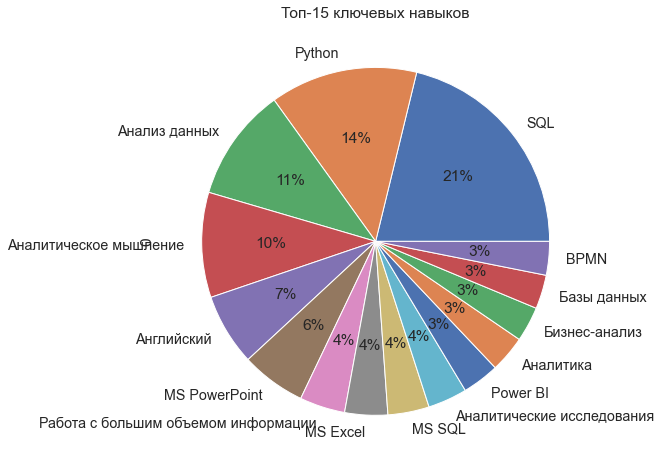

In [386]:
main_sk.plot(kind='pie', subplots=True, figsize=(8, 8), legend=False,
             autopct='%1.0f%%')
plt.title("Топ-15 ключевых навыков")

Основные навыки можно разделить на три типа: знание практических инструментов, интеллектуальные навыки и английский язык. Конечно, чаще всего упоминают знание SQL, т.к. он позволяет легко и быстро взаимодействовать и обрабатывать данные, а обработка данных, как было сказано на одной из лекций и как я понял в ходе выполнения этого задания, это 80% работы, а чем эффективнее инструменты для этой работы, тем её меньше. На втором месте идёт Python, про который можно сказать то же самое. Топ-3 замыкает "Анализ данных". Можно предположить, что для многих работодателей знание инструментов даже важнее, чем знание самой предметной области, либо это подразумевается при создании вакансии со стороны работодателя.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [393]:
salary_d = (new_d.salary.to_frame().dropna()).copy()
salary_d = pd.DataFrame.from_dict(salary_d.salary.tolist())

Определим количество пропусков в оставшихся данных

In [395]:
print(salary_d['from'].isna().sum(), salary_d['to'].isna().sum())

133 248


Скорректируем данные: заполним пропуски нулевым значением, иначе, в случае среднего или медианного, на гистограммах будут огромные сильновыраженные столбцы в соответствующих значениях; после сконвертируем заработную плату в иностранной валюте и переведём все значения в сумму, получаемую на руки (НДФЛ=13%).

In [396]:
salary_d['from'] = salary_d['from'].fillna(0)
salary_d['to'] = salary_d['to'].fillna(0)
salary_d = salary_d.dropna()

# USD -> * 75
# EUR -> * 80
salary_d.loc[salary_d.currency ==
             'USD', 'from'] = salary_d.loc[salary_d.currency ==
                                           'USD', 'from'] * 75
salary_d.loc[salary_d.currency ==
             'EUR', 'from'] = salary_d.loc[salary_d.currency ==
                                           'EUR', 'from'] * 80
salary_d.loc[salary_d.currency ==
             'USD', 'to'] = salary_d.loc[salary_d.currency ==
                                         'USD', 'to'] * 75
salary_d.loc[salary_d.currency ==
             'EUR', 'to'] = salary_d.loc[salary_d.currency ==
                                         'EUR', 'to'] * 80
salary_d.loc[salary_d.gross ==
             True, 'to'] = salary_d.loc[salary_d.gross ==
                                        True, 'to'] * 0.87
salary_d.loc[salary_d.gross ==
             True, 'from'] = salary_d.loc[salary_d.gross ==
                                          True, 'from'] * 0.87
salary_d.drop(labels={'currency', 'gross'}, axis=1, inplace=True)
salary_d

,from,to
0,52200.0,0.0
1,52200.0,0.0
2,104400.0,130500.0
3,0.0,300000.0
4,0.0,69600.0
...,...,...
649,230000.0,280000.0
650,58000.0,80000.0
651,0.0,270000.0
652,73950.0,0.0


Изобразим данные в виде гистограммы. Ограничим значения, чтобы избавиться от выбросов

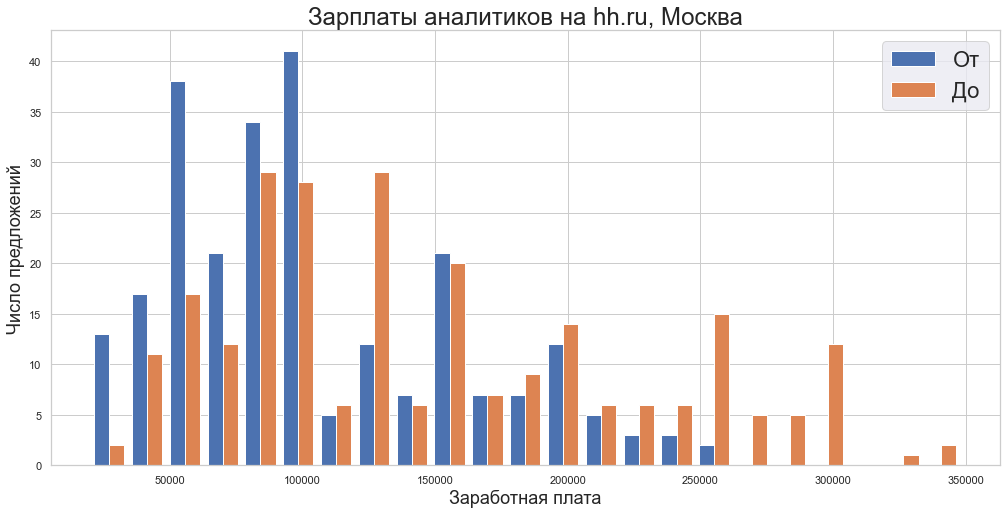

In [402]:
salary_d = salary_d.astype('int64')
salary_d = salary_d[(salary_d['from'] < 350000) & (salary_d['to'] < 350000)]
salary_d = salary_d[(salary_d['from'] > 100) & (salary_d['to'] > 100)]

with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(17, 8))
    plt.hist(salary_d, bins=20)
    sns.set(font_scale=2)
    plt.title('Зарплаты аналитиков на hh.ru, Москва')
    plt.legend(['От', 'До'])
    plt.xlabel('Заработная плата', fontsize=18)
    plt.ylabel('Число предложений', fontsize=18)

Сразу можно заметить две вещи:
* Значения зарплаты тяготеют к психологическим отметкам - круглым числам, особенно это заметно со 100 000 и в значениях 250 000 и 300 000. 
  
* Большая часть предложений приходится на значения включительно до 100 000. До этого числа предложений с обозначенной нижней зарплатой сильно больше, чем после. Верхние предложения, в свою очередь, смещены и имеют провалы в промежутках между 100 000, 125 000 и 150 000, которые тоже можно назвать психологическими порогами.

После 100 000 количество предложений с нижним порогом падает, что и не удивительно, потому что нижняя оценка и не должна быть большой в общем случае. Больше трудно сказать, так как данных очень мало, из почти 3000 вакансий только каждая пятая имеет какие-либо данные о заработной плате. Конечно, может быть она была указана в описании, которое было выброшено из данных при обработке, но анализ такого очень и очень трудоёмкий.

**Вывод:**  
* Профессия требует знания основных инструментов, аналитических способностей и нередко знание английского языка  
* Работодатели не так часто указывают заработную плату в вакансии. Стоит отметить, что бОльшая часть значений минимальной зарплаты находится в диапозоне от 50 000 до 100 000. Первое число близко к средней зарплате по всей России, а второе к средней зарплате в Москве. Можно сделать вывод, что професссия аналитика высокооплачиваемая  
* Сбор и обработка данных при анализе занимают больше времени, чем сама работа с данными.

-----------------------------------------------------------------------------------------------------------------------------

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

На hh.ru по запросам, представленным ниже, на момен выполнения задания выдаёт следующее количество вакансий:
* Программист - 17 705 вакансий в Москве
* Разработчик - 17 722 вакансий в Москве
* Programmer - 17 713 вакансий в Москве
* Developer - 52 912 вакансий в Москве

Соберём информацию об этих вакансиях. Не будем пытаться охватить всё, так как дэдлайн очень скоро, а отправлять 18 тысяч запросов долго...

In [406]:
URL = 'https://api.hh.ru/vacancies'

vacancies_dev = {'Программист','Разработчик', 'Programmer',
                 'Developer'}

params_dev = [[{
    'text': j,
    'area': 1,
    'page': i,
    'per_page': 100
} for i in range(100) for j in vacancies_dev] for j in vacancies_dev]

data_dev = list()
for page, vacancy in product(range(67), range(len(vacancies_dev))):
    req_dev = requests.get(URL, params_dev[vacancy][page])
    data_dev.extend(json.loads(req_dev.content.decode())['items'])
    sleep(0.5)

In [407]:
sampled_dev = pd.DataFrame(data_dev)

Посмотрим на параметры, которые выдаёт к каждой вакансии

In [408]:
sampled_dev.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'address',
       'response_url', 'sort_point_distance', 'published_at', 'created_at',
       'archived', 'apply_alternate_url', 'insider_interview', 'url',
       'adv_response_url', 'alternate_url', 'relations', 'employer', 'snippet',
       'contacts', 'schedule', 'working_days', 'working_time_intervals',
       'working_time_modes', 'accept_temporary', 'professional_roles',
       'accept_incomplete_resumes'],
      dtype='object')

Удалим дубликаты из выборки

In [409]:
df_dev = sampled_dev.copy()
df_dev = df_dev.drop_duplicates(subset='id')
df_dev.reset_index(drop=True, inplace=True)
df_dev

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes
0,77373213,False,Младший Бэкэнд разработчик (Junior Backend Dev...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 130000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Варшавское шоссе...",...,"{'id': '1134259', 'name': 'Геограком', 'url': ...",{'requirement': 'Навыки работы с PostgreSQL. Н...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",True,"[{'id': '96', 'name': 'Программист, разработчи...",False
1,77524072,False,Junior+ Backend Разработчик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Бутлерова'...",...,"{'id': '8903804', 'name': 'Вспорте', 'url': 'h...",{'requirement': 'Имеете опыт разработки на C#....,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False
2,77610885,True,Разработчик C (удаленная работа),None,False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 350000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Западный админис...",...,"{'id': '1588798', 'name': 'StormWall™', 'url':...",{'requirement': 'Хорошее знание языка С. Разра...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False
3,77471199,False,Go разработчик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 400000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '4334427', 'name': 'WeMakeTeam', 'url':...",{'requirement': 'Опыт проектирования микросерв...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False
4,76661659,False,Backend программист (SPRING),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 2500, 'to': 5500, 'currency': 'EUR', ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ленинградский пр...",...,"{'id': '3693000', 'name': 'Analytics Company',...",{'requirement': 'Возможность профессионального...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True,"[{'id': '96', 'name': 'Программист, разработчи...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,76341966,False,Tech Lead (Golang/Java) на разработку облачных...,"{'id': '1947314-1947314-ancor', 'name': 'ANCOR'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 400000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '1947314', 'name': 'ANCOR', 'url': 'htt...",{'requirement': 'Опыт <highlighttext>разработк...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '104', 'name': 'Руководитель группы ра...",False
3401,76520239,False,Backend Teamlead (Cashbox),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '697715', 'name': 'Emerging Travel Grou...",{'requirement': 'Опыт в <highlighttext>разрабо...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,"[{'id': '104', 'name': 'Руководитель группы ра...",False
3402,69881468,False,Android Developer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Парковая 16-я ул...",...,"{'id': '29316', 'name': 'Инк

Загрузим подробное описание каждой вакансии и создадим удобную для дальнейших действий таблицу данных.

In [410]:
my_list_dev = list()

for i in range(len(df_dev['id'])):
    vacancy_dev = df_dev.iloc[i]['id']
    vacancy_url_dev = f'https://api.hh.ru/vacancies/{vacancy_dev}'

    req_dev = requests.get(vacancy_url_dev)
    tmp_frame_dev = pd.json_normalize(json.loads(req_dev.content.decode()),
                                      max_level=0)
    my_list_dev.append(tmp_frame_dev)

    sleep(0.5)

df_dt_dev = pd.concat(my_list_dev).reset_index(drop=True)
df_dt_dev.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,77373213,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Младший Бэкэнд разработчик (Junior Backend Dev...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 130000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77373213,[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",True,[]
1,77524072,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Junior+ Backend Разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77524072,[],[],[],False,[]
2,77610885,True,"{'id': 'premium', 'name': 'Премиум'}",[],Разработчик C (удаленная работа),None,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 350000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77610885,[],[],[],False,[]
3,77471199,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Go разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 400000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77471199,[],[],[],False,[]
4,76661659,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Backend программист (SPRING),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 2500, 'to': 5500, 'currency': 'EUR', ...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/76661659,[],[],[],True,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,76341966,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Tech Lead (Golang/Java) на разработку облачных...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 400000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/76341966,[],[],[],False,[]
3401,76520239,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Backend Teamlead (Cashbox),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/76520239,[],[],[],False,"[{'id': 'eng', 'name': 'Английский', 'level': ..."
3402,69881468,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Android Developer,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/69881468,[],[],[],False,[]
3403,77113559,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Data Engineer,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/77113559,[],[],[],False,[]


Аналогично предыдущему разу, удалим ненужные колонки

In [412]:
dev_dt = df_dt_dev.copy()
dev_dt.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages'],
      dtype='object')

In [414]:
less_columns = {'premium', 'billing_type', 'relations', 'insider_interview',
                'response_letter_required','area', 'insider_interview',
                'insider_interview', 'allow_messages', 'description',
                'branded_description', 'vacancy_constructor_template',
                'accept_kids', 'response_url', 'code', 'hidden', 'created_at',
                'quick_responses_allowed', 'driver_license_types',
                'accept_incomplete_resumes', 'published_at', 'contacts',
                'initial_created_at', 'negotiations_url', 'schedule',
                'suitable_resumes_url', 'apply_alternate_url', 'test',
                'alternate_url', 'accept_temporary', 'has_test', 'department',
                'accept_handicapped', 'working_days', 'working_time_intervals',
                'working_time_modes', 'employment'}

new_dev = (dev_dt.drop(labels=less_columns, axis=1)).copy()

Поменяем тип данных в некоторых столбцах, чтобы было проще парсить и искать по ключевым словам.

In [417]:
new_dev['name'] = str(new_dev['name'])
new_dev['specializations'] = str(new_dev['specializations'])
new_dev['professional_roles'] = str(new_dev['professional_roles'])

Отбросим вакансии, которые могли попасть случайно из-за рекомендательной системы сайта. У ключевых слов уберём первую букву, чтобы не дублировать вариант с маленькой буквы.

In [500]:
# поменять ключевые слова
key_dev = {'азработчик', 'рограммист', 'eveloper'}

d_dev = pd.DataFrame()
for i in key_dev:
    d_dev = (pd.concat([d_dev,
                        new_dev[(new_dev.specializations.str.contains(i)) |
                                (new_dev.professional_roles.str.contains(i)) |
                                (new_dev.name.str.contains(i))]])).copy()

# Отбросим архивированые, закрытые и анонимные вакансии
d_dev = d_dev[d_dev.archived == False]
d_dev = d_dev[d_dev.type == {'id': 'open', 'name': 'Открытая'}]
d_dev = d_dev.drop(labels={'specializations', 'professional_roles', 'type',
                           'archived'}, axis=1)
d_dev.drop_duplicates(['id'], inplace=True)

d_dev['id'] = d_dev['id'].astype('int64')
d_dev = d_dev.sort_values(by='id').reset_index(drop=True).set_index('id')
len(d_dev)

3401

Сейчас достуно почти три с половиной тысячи вакансий по запросам Разработчик, Прогарммист, Programmer, Developer. Это нельзя назвать точной оценкой, так как в выборку могли попасть, например, девелоперы из сферы строительства и недвижимости, что не имеет отношения к профессии программиста. В остальном выводы почти такие же, как и в случае аналитика, только вакансий на 450 штук больше. 3500 человек это всё ещё не больше половины студентов Физтеха.

Навык английского языка выделим отдельно, чтобы корректно посчитать количество упоминаний.

In [420]:
dev_skills_list = list()
for d in d_dev.key_skills:
    for v in d:
        if (not ('нглийский' in v['name'])):
            dev_skills_list.append(v['name'])

dev_languages_list = list()
for d in d_dev.languages:
    for v in d:
        dev_languages_list.append(v['name'])

dev_skills_dict = Counter(dev_skills_list) | Counter(dev_languages_list)
dev_main_sk = pd.DataFrame(dev_skills_dict, index=[0]).T.sort_values(by=0,
                           ascending=False).head(15)
dev_main_sk

,0
Git,755
JavaScript,573
PostgreSQL,493
SQL,477
PHP,421
Linux,364
Английский,362
Python,344
MySQL,344
ООП,308


Text(0.5, 1.0, 'Топ-15 ключевых навыков')

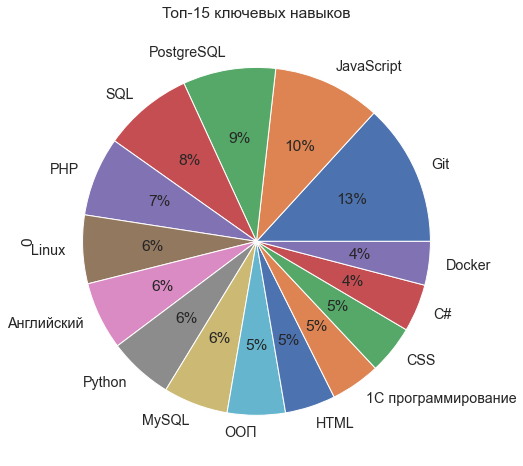

In [421]:
dev_main_sk.plot(kind='pie', subplots=True, figsize=(8, 8), legend=False,
                 autopct='%1.0f%%')
plt.title("Топ-15 ключевых навыков")

Здесь картина отличается от аналогичной круговой диаграммы для аналитиков. На первом месте выделяется знание git, что, конечно предсказуемо, т.к. трудно представить себе разработку проекта без использования этой системы. В остальном навыки распределены между разными инструментами программирования. Хотя можно выделить такие навыки как Английский, Linux и ООП - их нельзя назвать инструментами. Английский это навык, который очень помогает при разборе докунтации, и нельзя сказать, что он необходим в какой-то конкретной области, например, бэкэнд или фронтэнд. Знание линукса и ООП скорее теоритическая история про понимание, так что про эти навыки тоже можно сказать, на сколько они требуемы в целом, т.к. остальные навывки представляют из себя языки программирования и платформы, которым соответствуют разные области программирования.

Исследуем зарплату

In [422]:
salary_dev = (d_dev.salary.to_frame().dropna()).copy()
salary_dev = pd.DataFrame.from_dict(salary_dev.salary.tolist())
salary_dev

,from,to,currency,gross
0,350000.0,450000.0,RUR,False
1,380000.0,NaN,RUR,True
2,100000.0,NaN,RUR,False
3,100000.0,NaN,RUR,True
4,330000.0,NaN,RUR,True
...,...,...,...,...
1710,40000.0,NaN,RUR,False
1711,230000.0,300000.0,RUR,False
1712,100000.0,NaN,RUR,False
1713,80000.0,NaN,RUR,True


Определим количество пропусков в оставшихся данных

In [423]:
print(salary_dev['from'].isna().sum(), salary_dev['to'].isna().sum())

295 620


Скорректируем данные: заполним пропуски нулевым значением, иначе, в случае среднего или медианного, на гистограммах будут огромные сильновыраженные столбцы в соответствующих значениях; после сконвертируем заработную плату в иностранной валюте и переведём все значения в сумму, получаемую на руки (НДФЛ=13%).

In [425]:
salary_dev['from'] = salary_dev['from'].fillna(0)
salary_dev['to'] = salary_dev['to'].fillna(0)
salary_dev = salary_dev.dropna()

# USD -> * 75
# EUR -> * 80
salary_dev.loc[salary_dev.currency ==
               'USD', 'from'] = salary_dev.loc[salary_dev.currency ==
                                               'USD', 'from'] * 75
salary_dev.loc[salary_dev.currency ==
               'EUR', 'from'] = salary_dev.loc[salary_dev.currency ==
                                               'EUR', 'from'] * 80
salary_dev.loc[salary_dev.currency ==
               'USD', 'to'] = salary_dev.loc[salary_dev.currency ==
                                             'USD', 'to'] * 75
salary_dev.loc[salary_dev.currency ==
               'EUR', 'to'] = salary_dev.loc[salary_dev.currency ==
                                             'EUR', 'to'] * 80
salary_dev.loc[salary_dev.gross ==
               True, 'to'] = salary_dev.loc[salary_dev.gross ==
                                            True, 'to'] * 0.87
salary_dev.loc[salary_dev.gross ==
               True, 'from'] = salary_dev.loc[salary_dev.gross ==
                                              True, 'from'] * 0.87
salary_dev.drop(labels={'currency', 'gross'}, axis=1, inplace=True)
salary_dev

,from,to
0,350000.0,450000.0
1,330600.0,0.0
2,100000.0,0.0
3,87000.0,0.0
4,287100.0,0.0
...,...,...
1710,40000.0,0.0
1711,230000.0,300000.0
1712,100000.0,0.0
1713,69600.0,0.0


Изобразим данные в виде гистограммы. Ограничим значения, чтобы избавиться от выбросов

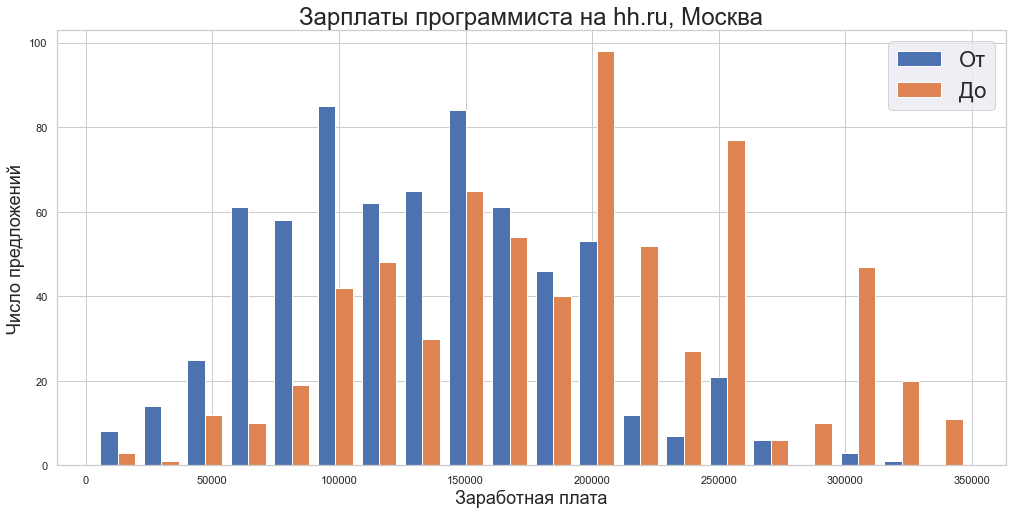

In [426]:
salary_dev = salary_dev.astype('int64')
salary_dev = salary_dev[(salary_dev['from'] < 350000) &
                        (salary_dev['to'] < 350000)]
salary_dev = salary_dev[(salary_dev['from'] > 100) & (salary_dev['to'] > 100)]

with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(17, 8))
    plt.hist(salary_dev, bins=20)
    sns.set(font_scale=2)
    plt.title('Зарплаты программиста на hh.ru, Москва')
    plt.legend(['От', 'До'])
    plt.xlabel('Заработная плата', fontsize=18)
    plt.ylabel('Число предложений', fontsize=18)

Сразу бросается в глаза, что некоторый "горб" колонок смещён вправо, из чего можно сделать вывод, что зарплаты в этой области выше. Если в случае аналитика больше всего предложений по верхней оценке было для з\п в 100 000, то тут это число в 2 раза больше. Снова можно сказать про психологические отметки - предложений с круглыми суммами больше. Для нижней оценки это 100 000 и 150 000, для верхней 200 000б 250 000 и 300 000. Из этого можно сделать вывод, что на рынке большая потребность в высококвалифицированных программитстах, т.к. больше всего нижних оценок у значений 100 000 и 150 000, да и количество предложений с з\п до 200 000+ говорит о том же. Видна разница с аналитиками.

Не забывайте про выводы.

**Вывод:** 
* Делать исследование разных вакансий с одинаково поставленными вопросами легко, т.к. можно просто копипастить код, подстраивая некоторые значения для корректной работы.
* Предложений для разработчиков больше, чем для аналитиков, и зарплата в вакансиях  выше, особенно это заметно в районе 100 000.
* В обоих вакансиях преобладает знание инструментов области, но в случае аналитика выделяются интеллектуальные требования.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Рассмотрим поставленные вопросы для вакансии аналитика, которая рассматривалась в первую очередь.

In [434]:
hard_d = new_d.copy()

Оставим только необходимые для анализа столбцы

In [435]:
hard_d.drop(labels={'name', 'salary', 'key_skills', 'languages'}, axis=1,
            inplace=True)
hard_d

,address,experience,employer
id,,,
39904397,"{'city': 'Москва', 'street': 'Головинское шосс...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': '78638', 'name': 'Тинькофф', 'url': 'ht..."
42134089,"{'city': 'Москва', 'street': 'Головинское шосс...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': '78638', 'name': 'Тинькофф', 'url': 'ht..."
43342136,"{'city': 'Москва', 'street': 'Замоскворецкая л...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': '78638', 'name': 'Тинькофф', 'url': 'ht..."
44782896,"{'city': 'Москва', 'street': 'Нижний Сусальный...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': '4620', 'name': 'ГЛОРИЯ ДЖИНС', 'url': ..."
47081802,"{'city': 'Москва', 'street': 'Нижний Сусальный...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': '4620', 'name': 'ГЛОРИЯ ДЖИНС', 'url': ..."
...,...,...,...
77637655,None,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': '5488399', 'name': 'Самокат (ООО Умное ..."
77638002,None,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': '4023', 'name': 'Райффайзен Банк', 'url..."
77638024,"{'city': 'Москва', 'street': 'улица Миклухо-Ма...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': '3305831', 'name': 'ДиДиИкс', 'url': 'h..."


Посмотрим с какой информацией можно столкнуться в графе об опыте работы.

In [440]:
experience_d = (hard_d.experience.to_frame().dropna()).copy()
experience_d = pd.DataFrame.from_dict(experience_d.experience.tolist())
experience_d['name'].unique()

array(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

Сосчитаем упоминания каждого требования

In [447]:
pie_d = experience_d.groupby(by='name').count()
pie_d

,id
name,
Более 6 лет,86
Нет опыта,155
От 1 года до 3 лет,1470
От 3 до 6 лет,1239


Визуализируем полученную информацию в виде круговой диаграммы

Text(0.5, 1.0, 'Требования к опыту работы')

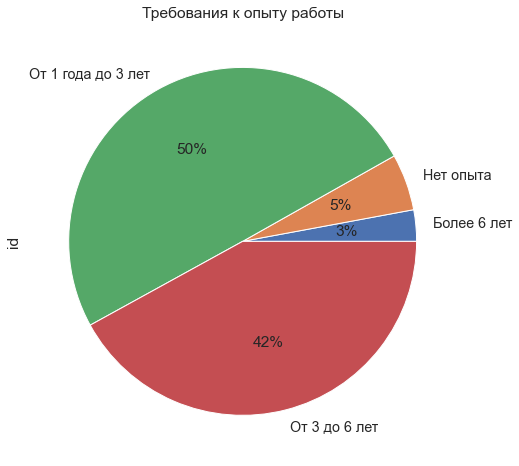

In [448]:
pie_d.plot(kind='pie', subplots=True, figsize=(8, 8), legend=False,
           autopct='%1.0f%%')
plt.title("Требования к опыту работы")

Предположу, что опыт более 6 лет требуется в сложных задачах и проектах, а отсутствие опыта наоборот относится к небольшим или молодым проектам, либо маленьким компаниям. В остальном для соответствия подавляющему большенству вакансий достаточно опыта работы около 3-х лет. Из того, что требование от 1 до 3-х лет занимает половину, можно предлоложить, что им соответствуют проекты и задачи средней сложности, либо аналитик данных требуется для выполнения несложной в рамках индустрии работы.

Посмотрим теперь на топ работодателей

In [501]:
employer_d = (hard_d.employer.to_frame().dropna()).copy()
employer_d = pd.DataFrame.from_dict(employer_d.employer.tolist())
employer_count = employer_d.groupby(by='name').count()
employer_count = employer_count.sort_values(by='id',ascending=False)
employer_count = employer_count['id'].to_frame().head(15)
employer_count

,id
name,
СБЕР,189
МТС,67
Яндекс,49
VK,44
билайн,43
Банк ВТБ (ПАО),36
Тинькофф,32
Спортмастер,26
"Иннотех, Группа компаний",25


Визуализируем полученную информацию в виде круговой диаграммы

Text(0.5, 1.0, 'Топ-15 работодателей для аналитиков')

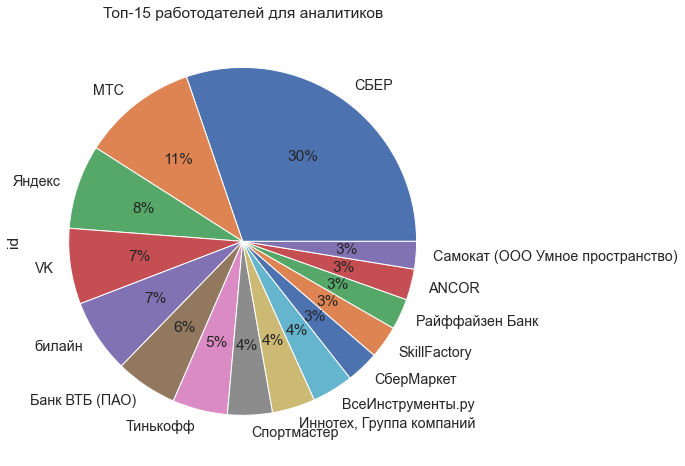

In [468]:
employer_count.plot(kind='pie', subplots=True, figsize=(8, 8), legend=False,
                    autopct='%1.0f%%')
plt.title("Топ-15 соискателей аналитиков")

Если условиться, что сегодня банки и мобильные операторы превращаются в IT-компании, то из диаграммы видно, что основную массу вакансий размещают IT-компании, которые работают с большими объёмами данных, которые необходимо анализировать. Вторая группа компаний это сетевые магазины, что не удивительно. Конечно, ещё есть SkillFactory и ANCOR, но я не могу ничего про них сказать. Ещё стоит отметить, что больше всего вакансий размещает СБЕР, причём с большим отрывом от других компаний. Почему так? Могу лишь предположить, что сбер любит платформу hh.ru.

Визуализируем данные вакансии на карте

In [477]:
address_d = (hard_d.address.to_frame().dropna()).copy()
address_d = pd.DataFrame.from_dict(address_d.address.tolist())
address_d.drop(labels={'city', 'street', 'building', 'description', 'raw',
                       'metro', 'metro_stations'}, axis=1, inplace=True)
address_d.dropna(inplace=True)
address_d.reset_index(drop=True, inplace=True)
address_d

,lat,lng
0,55.840240,37.492024
1,55.840240,37.492024
2,55.840209,37.486616
3,55.760089,37.662776
4,55.760089,37.662776
...,...,...
1387,55.736037,37.710719
1388,55.871183,37.649759
1389,55.762237,37.617069
1390,55.640111,37.532951


In [496]:
fig = px.density_mapbox(address_d, lat='lat', lon='lng',
                        center=dict(lat=55.7522200, lon=37.6155600), zoom=9.7,
                        opacity=0.3, width=1000, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.write_html('alaitic_map.html')

Какие выводы можно сделать из построенных графиков?

* Сильнее всего на карте выделяется центр Москвы. С одной стороны в центре много офисов, с другой дорогая недвижимость и аренда. Можно предположить, что всё-таки аналитики данных требуются для крупных компаний, которые могут себе позволить такую аренду. Вне центра интенсивность быстро падает, что можно объяснить жилой застройкой и спальными кварталами.

* Аналитики данных треуются в основном в компаниях, которые и работают с этими данными в больших объёмах, и для которых информация об этих данных может повлиять на дальнейшее развитие бизнеса. Неудивительно.

* Опыта в 1-3 года зачастую достаточно. Можно сделать вывод, что потребности рынка в аналитиках данных неудовлетворены и профессия является актуальной.